# **1) Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

# Importamos los datos tratados.
df = pd.read_csv('/content/datos_tratados.csv')
df.head()


,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Cantidad_Servicios
0,0002ORFBO,0,f,0,1,1,9,1,no,dsl,...,si,si,no,un ano,1,cheque enviado por correo,65.6,593.30,2.155059,5
1,0003MKNFE,0,m,0,0,0,9,1,si,dsl,...,no,no,si,mes a mes,0,cheque enviado por correo,59.9,542.40,1.967806,4
2,0004TLHLJ,1,m,0,0,0,4,1,no,fibra optica,...,no,no,no,mes a mes,1,cheque electronico,73.9,280.85,2.427727,3
3,0011IGKFF,1,m,1,1,0,13,1,no,fibra optica,...,no,si,si,mes a mes,1,cheque electronico,98.0,1237.85,3.219448,6
4,0013EXCHZ,1,f,1,1,0,3,1,no,fibra optica,...,si,si,no,mes a mes,1,cheque enviado por correo,83.9,267.40,2.756242,4


In [ ]:
# Vemos información general sobre el DataFrame (tipos de datos, valores no nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Dejo_el_servicio         7267 non-null   int64  
 2   Genero                   7267 non-null   object 
 3   Ciudadano_Mayor          7267 non-null   int64  
 4   Pareja                   7267 non-null   int64  
 5   Dependientes             7267 non-null   int64  
 6   Tiempo_Servicio          7267 non-null   int64  
 7   Servicio_Telefonico      7267 non-null   int64  
 8   Multiples_Lineas         7267 non-null   object 
 9   Servicio_Internet        7267 non-null   object 
 10  Seguridad_Online         7267 non-null   object 
 11  Copia_Seguridad_Online   7267 non-null   object 
 12  Proteccion_Dispositivo   7267 non-null   object 
 13  Soporte_Tecnico          7267 non-null   object 
 14  Streaming_TV            

## **2) Eliminación de Columnas Irrelevantes**

In [ ]:
# Eliminar la columna ID_Cliente
print("DataFrame después de eliminar 'ID_Cliente':")
df.head()

DataFrame después de eliminar 'ID_Cliente':


,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Cantidad_Servicios
0,0002ORFBO,0,f,0,1,1,9,1,no,dsl,...,si,si,no,un ano,1,cheque enviado por correo,65.6,593.30,2.155059,5
1,0003MKNFE,0,m,0,0,0,9,1,si,dsl,...,no,no,si,mes a mes,0,cheque enviado por correo,59.9,542.40,1.967806,4
2,0004TLHLJ,1,m,0,0,0,4,1,no,fibra optica,...,no,no,no,mes a mes,1,cheque electronico,73.9,280.85,2.427727,3
3,0011IGKFF,1,m,1,1,0,13,1,no,fibra optica,...,no,si,si,mes a mes,1,cheque electronico,98.0,1237.85,3.219448,6
4,0013EXCHZ,1,f,1,1,0,3,1,no,fibra optica,...,si,si,no,mes a mes,1,cheque enviado por correo,83.9,267.40,2.756242,4


In [ ]:
# Revisamos las columnas restantes
print(df.columns.tolist())

['ID_Cliente', 'Dejo_el_servicio', 'Genero', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Tiempo_Servicio', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios']


# **3) Encoding**

Transformamos las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

In [ ]:
# Importamos la librería necesaria
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creamos una copia del DataFrame para no modificar el original (Es una buena práctica conservar el original)
df_codificado = df.copy()

In [ ]:
# Identificamos automáticamente las columnas categóricas (tipo 'object')
columnas_categoricas = df_codificado.select_dtypes(include=['object']).columns.tolist()

print("Columnas categóricas identificadas:")
print(columnas_categoricas)

Columnas categóricas identificadas:
['ID_Cliente', 'Genero', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Metodo_Pago']


In [ ]:
# Creamos un diccionario para guardar los codificadores (útil si en el futuro necesitamos decodificar o entender las transformaciones)
label_encoders = {}

In [ ]:
# Aplicamos LabelEncoder a cada columna categórica
for columna in columnas_categoricas:
    le = LabelEncoder()
    # Ajustamos el codificador y transformamos la columna
    df_codificado[columna] = le.fit_transform(df_codificado[columna])
    # Guardamos el codificador para referencia
    label_encoders[columna] = le
    print(f"\nTransformación para '{columna}':")
    # Mostramos las clases originales y su correspondencia numérica (Esto me costo mucho tiempo entenderlo y hacerlo)
    for i, clase in enumerate(le.classes_):
        print(f"  '{clase}' -> {i}")


Transformación para 'ID_Cliente':
  '0002ORFBO' -> 0
  '0003MKNFE' -> 1
  '0004TLHLJ' -> 2
  '0011IGKFF' -> 3
  '0013EXCHZ' -> 4
  '0013MHZWF' -> 5
  '0013SMEOE' -> 6
  '0014BMAQU' -> 7
  '0015UOCOJ' -> 8
  '0016QLJIS' -> 9
  '0017DINOC' -> 10
  '0017IUDMW' -> 11
  '0018NYROU' -> 12
  '0019EFAEP' -> 13
  '0019GFNTW' -> 14
  '0020INWCK' -> 15
  '0020JDNXP' -> 16
  '0021IKXGC' -> 17
  '0022TCJCI' -> 18
  '0023HGHWL' -> 19
  '0023UYUPN' -> 20
  '0023XUOPT' -> 21
  '0027KWYKW' -> 22
  '0030FNXPP' -> 23
  '0031PVLZI' -> 24
  '0032PGELS' -> 25
  '0036IHMOT' -> 26
  '0040HALCW' -> 27
  '0042JVWOJ' -> 28
  '0042RLHYP' -> 29
  '0047ZHDTW' -> 30
  '0048LUMLS' -> 31
  '0048PIHNL' -> 32
  '0052DCKON' -> 33
  '0052YNYOT' -> 34
  '0056EPFBG' -> 35
  '0057QBUQH' -> 36
  '0058EVZWM' -> 37
  '0060FUALY' -> 38
  '0064SUDOG' -> 39
  '0064YIJGF' -> 40
  '0067DKWBL' -> 41
  '0068FIGTF' -> 42
  '0071NDAFP' -> 43
  '0074HDKDG' -> 44
  '0076LVEPS' -> 45
  '0078XZMHT' -> 46
  '0080EMYVY' -> 47
  '0080OROZO' -

In [ ]:
# Verificamos el resultado mostrando las primeras filas
print("\nDataFrame después de la codificación:")
df_codificado.head()


DataFrame después de la codificación:


,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Cantidad_Servicios
0,0,0,0,0,1,1,9,1,0,0,...,2,2,0,2,1,2,65.6,593.30,2.155059,5
1,1,0,1,0,0,0,9,1,2,0,...,0,0,2,1,0,2,59.9,542.40,1.967806,4
2,2,1,1,0,0,0,4,1,0,1,...,0,0,0,1,1,1,73.9,280.85,2.427727,3
3,3,1,1,1,1,0,13,1,0,1,...,0,2,2,1,1,1,98.0,1237.85,3.219448,6
4,4,1,0,1,1,0,3,1,0,1,...,2,2,0,1,1,2,83.9,267.40,2.756242,4


## **4) Verificación de la Proporción de Cancelación (Dejo el servicio)** Antiguo Churn.

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
# Verificamos la proporción de la variable objetivo 'Dejo_el_servicio'
# 0 significa que el cliente NO dejó el servicio
# 1 significa que el cliente SÍ dejó el servicio

# Contamos la cantidad de clientes en cada categoría
conteo_cancelaciones = df_codificado['Dejo_el_servicio'].value_counts()

# Calculamos las proporciones (porcentajes)
proporcion_cancelaciones = df_codificado['Dejo_el_servicio'].value_counts(normalize=True) * 100

In [ ]:
# Mostramos los resultados
print("Conteo de clientes por estado de cancelación:")
print(conteo_cancelaciones)
print("\nProporción (porcentaje) de clientes por estado de cancelación:")
print(proporcion_cancelaciones)

Conteo de clientes por estado de cancelación:
Dejo_el_servicio
0    5398
1    1869
Name: count, dtype: int64

Proporción (porcentaje) de clientes por estado de cancelación:
Dejo_el_servicio
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [ ]:
# También podemos mostrarlo de forma más visual
print("\nResumen detallado:")
print(f"Clientes que NO dejaron el servicio fueron (0): {conteo_cancelaciones[0]} (con un {proporcion_cancelaciones[0]:.2f}%)")
print(f"Clientes que SÍ dejaron el servicio fueron (1): {conteo_cancelaciones[1]} (con un {proporcion_cancelaciones[1]:.2f}%)")


Resumen detallado:
Clientes que NO dejaron el servicio fueron (0): 5398 (con un 74.28%)
Clientes que SÍ dejaron el servicio fueron (1): 1869 (con un 25.72%)


In [ ]:
# Evaluamos el desbalance
diferencia_porcentual = abs(proporcion_cancelaciones[0] - proporcion_cancelaciones[1])
print(f"\nDiferencia porcentual entre clases: {diferencia_porcentual:.2f}%")

if diferencia_porcentual > 15:
    print("-> Las clases están desbalanceadas. Esto puede afectar el rendimiento de los modelos.")
elif diferencia_porcentual > 5:
    print("-> Hay un leve desbalance entre las clases.")
else:
    print("-> Las clases están bastante balanceadas.")


Diferencia porcentual entre clases: 48.56%
-> Las clases están desbalanceadas. Esto puede afectar el rendimiento de los modelos.


## **5) Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
# Instalamos la librería necesaria
!pip install imbalanced-learn

In [ ]:
# Importamos las librerías necesarias
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Separamos las características (X) de la variable objetivo (y)
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

print("Distribución original de las clases:")
print(sorted(Counter(y).items()))

Distribución original de las clases:
[(0, 5398), (1, 1869)]


In [ ]:
# 1. Aplicamos Undersampling (reducir la clase mayoritaria)
print("\n--- Aplicando Undersampling ---")
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
print('Distribución después de undersampling:')
print(sorted(Counter(y_under).items()))


--- Aplicando Undersampling ---
Distribución después de undersampling:
[(0, 1869), (1, 1869)]


In [ ]:
# 2. Aplicamos Oversampling (aumentar la clase minoritaria)
print("\n--- Aplicando Oversampling ---")

# Fill missing values in 'Cargos_Totales' with the mean
X_filled = X.fillna(X['Cargos_Totales'].mean())

oversample = SMOTE(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X_filled, y)
print('Distribución después de oversampling:')
print(sorted(Counter(y_over).items()))


--- Aplicando Oversampling ---
Distribución después de oversampling:
[(0, 5398), (1, 5398)]


## **6) Normalización o Estandarización (si es necesario).**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
# Mostramos las estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(df_codificado.describe())

# Veamos también las columnas que tenemos
print("\nColumnas en el DataFrame codificado:")
print(df_codificado.columns.tolist())

Estadísticas descriptivas de las variables numéricas:
        ID_Cliente  Dejo_el_servicio       Genero  Ciudadano_Mayor  \
count  7267.000000       7267.000000  7267.000000      7267.000000   
mean   3633.000000          0.257190     0.505711         0.162653   
std    2097.946536          0.437115     0.500002         0.369074   
min       0.000000          0.000000     0.000000         0.000000   
25%    1816.500000          0.000000     0.000000         0.000000   
50%    3633.000000          0.000000     1.000000         0.000000   
75%    5449.500000          1.000000     1.000000         0.000000   
max    7266.000000          1.000000     1.000000         1.000000   

            Pareja  Dependientes  Tiempo_Servicio  Servicio_Telefonico  \
count  7267.000000   7267.000000      7267.000000          7267.000000   
mean      0.484106      0.300124        32.346498             0.902711   
std       0.499782      0.458343        24.571773             0.296371   
min       0.000000 

In [ ]:
# Evaluamos la necesidad de escalado:
# Importamos las librerías necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Mostramos información sobre la necesidad de escalado
print("=== EVALUACIÓN DE LA NECESIDAD DE ESCALADO ===")
print("\nRango de valores en algunas columnas numéricas clave:")

# Mostramos el rango de algunas variables importantes
variables_a_ver = ['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio', 'Cantidad_Servicios']
for var in variables_a_ver:
    if var in df_codificado.columns:
        min_val = df_codificado[var].min()
        max_val = df_codificado[var].max()
        print(f"  {var}: min={min_val}, max={max_val}")

=== EVALUACIÓN DE LA NECESIDAD DE ESCALADO ===

Rango de valores en algunas columnas numéricas clave:
  Cargos_Mensuales: min=18.25, max=118.75
  Cargos_Totales: min=18.8, max=8684.8
  Tiempo_Servicio: min=0, max=72
  Cantidad_Servicios: min=1, max=9


In [ ]:
# Ejemplo de cómo aplicar estandarización si fuera necesario
print("\n=== EJEMPLO DE ESTANDARIZACIÓN (para modelos que la requieren) ===")

# Separamos las características de la variable objetivo
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

# Aplicamos StandardScaler
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

# Convertimos de vuelta a DataFrame para facilitar su uso
X_estandarizado_df = pd.DataFrame(X_estandarizado, columns=X.columns)

print("Datos antes de estandarizar (primeras 5 filas de algunas columnas):")
print(X[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].head())

print("\nDatos después de estandarizar (primeras 5 filas de las mismas columnas):")
print(X_estandarizado_df[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].head())

print("\nEstadísticas después de estandarizar:")
print(X_estandarizado_df[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].describe())


=== EJEMPLO DE ESTANDARIZACIÓN (para modelos que la requieren) ===
Datos antes de estandarizar (primeras 5 filas de algunas columnas):
   Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
0              65.6          593.30                9
1              59.9          542.40                9
2              73.9          280.85                4
3              98.0         1237.85               13
4              83.9          267.40                3

Datos después de estandarizar (primeras 5 filas de las mismas columnas):
   Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
0          0.029206       -0.743818        -0.950200
1         -0.159990       -0.766256        -0.950200
2          0.304702       -0.881554        -1.153700
3          1.104635       -0.459685        -0.787401
4          0.636624       -0.887483        -1.194400

Estadísticas después de estandarizar:
       Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
count      7.267000e+03    7.256000e+03     7.267000e+03
m

### **Aplicando la estandarización a todo tu conjunto de datos.**

In [ ]:
# Importamos la librería necesaria para la estandarización
from sklearn.preprocessing import StandardScaler

In [ ]:
# Verificamos las columnas actuales de nuestro DataFrame
print("Columnas en el DataFrame antes de estandarizar:")
print(df_codificado.columns.tolist())

Columnas en el DataFrame antes de estandarizar:
['ID_Cliente', 'Dejo_el_servicio', 'Genero', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Tiempo_Servicio', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios']


In [ ]:
# Separamos las características (X) de la variable objetivo (y)
# 'Dejo_el_servicio' es la variable objetivo
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

print(f"\nForma de X (características) antes de estandarizar: {X.shape}")
print(f"Forma de y (objetivo) antes de estandarizar: {y.shape}")


Forma de X (características) antes de estandarizar: (7267, 22)
Forma de y (objetivo) antes de estandarizar: (7267,)


In [ ]:
# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler a los datos de entrenamiento y transformamos
# Esto calcula la media y desviación estándar de cada columna y luego aplica la transformación
X_estandarizado = scaler.fit_transform(X)

In [ ]:
# Creamos un nuevo DataFrame con los datos estandarizados
df_estandarizado = X_estandarizado_df.copy()
df_estandarizado['Dejo_el_servicio'] = y

print(f"\nForma del nuevo DataFrame estandarizado: {df_estandarizado.shape}")

# Mostramos las primeras filas para ver el resultado
print("\nPrimeras filas del DataFrame ESTANDARIZADO:")
print(df_estandarizado.head())

# Verificamos que la estandarización funcionó correctamente
# Después de la estandarización, cada columna debería tener media cercana a 0 y desviación estándar cercana a 1
print("\nEstadísticas descriptivas después de estandarizar (deberían tener media≈0 y std≈1):")
print(X_estandarizado_df.describe())



Forma del nuevo DataFrame estandarizado: (7267, 23)

Primeras filas del DataFrame ESTANDARIZADO:
   ID_Cliente    Genero  Ciudadano_Mayor    Pareja  Dependientes  \
0   -1.731812 -1.011487        -0.440736  1.032309      1.527075   
1   -1.731336  0.988643        -0.440736 -0.968702     -0.654847   
2   -1.730859  0.988643        -0.440736 -0.968702     -0.654847   
3   -1.730382  0.988643         2.268932  1.032309     -0.654847   
4   -1.729906 -1.011487         2.268932  1.032309     -0.654847   

   Tiempo_Servicio  Servicio_Telefonico  Multiples_Lineas  Servicio_Internet  \
0        -0.950200              0.32829         -0.992156          -1.186213   
1        -0.950200              0.32829          1.116955          -1.186213   
2        -1.153700              0.32829         -0.992156           0.169166   
3        -0.787401              0.32829         -0.992156           0.169166   
4        -1.194400              0.32829         -0.992156           0.169166   

   Seguridad

## **7) Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Verificamos que estamos usando el DataFrame codificado y estandarizado
print("Usando el DataFrame estandarizado para el análisis de correlación")
print(f"Forma del DataFrame: {df_estandarizado.shape}")

Usando el DataFrame estandarizado para el análisis de correlación
Forma del DataFrame: (7267, 23)


In [ ]:
# Calculamos la matriz de correlación
# Esta matriz muestra cómo se relacionan linealmente todas las variables numéricas entre sí
matriz_correlacion = df_estandarizado.corr()

# Mostramos las correlaciones de todas las variables con respecto a 'Dejo_el_servicio'
# Ordenamos de mayor a menor para ver las más fuertes
correlaciones_con_objetivo = matriz_correlacion['Dejo_el_servicio'].sort_values(key=abs, ascending=False)

print("\n=== CORRELACIONES CON LA VARIABLE OBJETIVO 'Dejo_el_servicio' ===")
print("(Ordenadas por valor absoluto - las más fuertes primero)")
for variable, correlacion in correlaciones_con_objetivo.items():
    print(f"  {variable}: {correlacion:.4f}")

# Identificamos las variables con correlación más fuerte (abs > 0.2)
print("\n=== VARIABLES CON CORRELACIÓN FUERTE (|r| > 0.2) ===")
variables_fuertes = correlaciones_con_objetivo[abs(correlaciones_con_objetivo) > 0.2]
if len(variables_fuertes) > 1:  # >1 porque siempre estará 'Dejo_el_servicio' consigo misma (1.0)
    # Excluimos la variable objetivo consigo misma
    variables_fuertes_sin_objetivo = variables_fuertes.drop('Dejo_el_servicio')
    for variable, correlacion in variables_fuertes_sin_objetivo.items():
        print(f"  {variable}: {correlacion:.4f}")
else:
    print("No se encontraron variables con correlación fuerte (>0.2)")


=== CORRELACIONES CON LA VARIABLE OBJETIVO 'Dejo_el_servicio' ===
(Ordenadas por valor absoluto - las más fuertes primero)
  Dejo_el_servicio: 1.0000
  Tiempo_Servicio: -0.3441
  Seguridad_Online: -0.2831
  Soporte_Tecnico: -0.2764
  Cargos_Totales: -0.1944
  Copia_Seguridad_Online: -0.1917
  Cuentas_Diarias: 0.1899
  Cargos_Mensuales: 0.1899
  Facturacion_Electronica: 0.1867
  Proteccion_Dispositivo: -0.1736
  Dependientes: -0.1614
  Pareja: -0.1485
  Ciudadano_Mayor: 0.1467
  Metodo_Pago: -0.0930
  Contrato: 0.0826
  Servicio_Internet: -0.0481
  Streaming_Peliculas: -0.0378
  Multiples_Lineas: 0.0370
  Streaming_TV: -0.0359
  ID_Cliente: -0.0196
  Cantidad_Servicios: -0.0177
  Servicio_Telefonico: 0.0126
  Genero: -0.0096

=== VARIABLES CON CORRELACIÓN FUERTE (|r| > 0.2) ===
  Tiempo_Servicio: -0.3441
  Seguridad_Online: -0.2831
  Soporte_Tecnico: -0.2764



=== GENERANDO MAPA DE CALOR DE CORRELACIONES ===


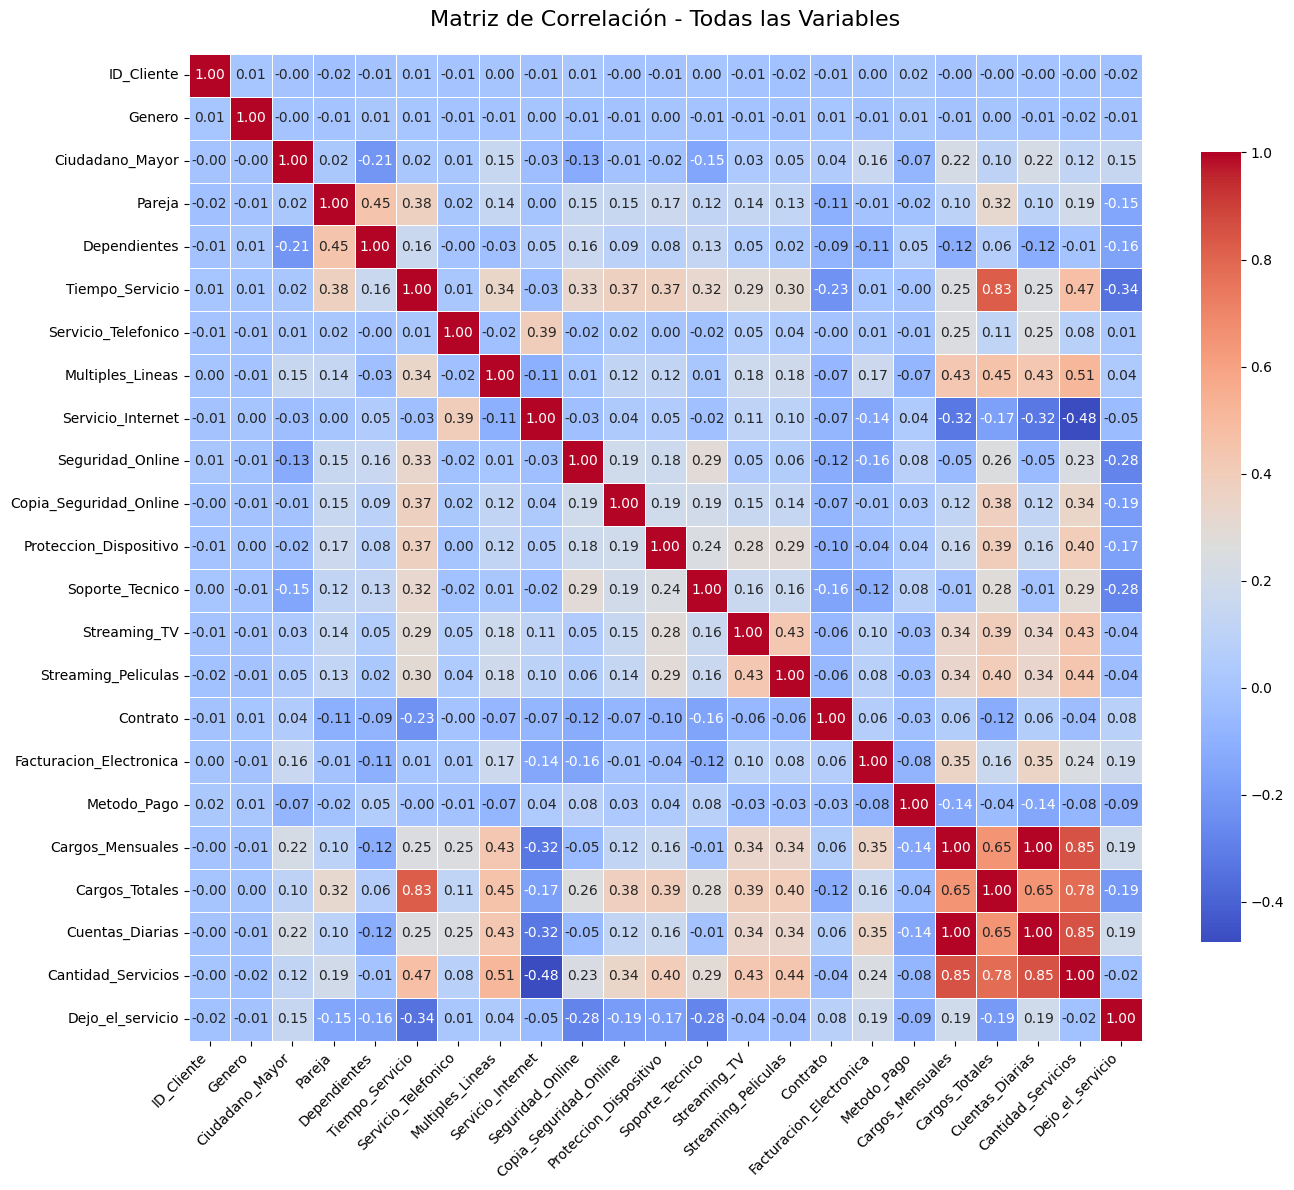

In [ ]:
# Visualizamos la matriz de correlación completa (mapa de calor)
print("\n=== GENERANDO MAPA DE CALOR DE CORRELACIONES ===")
plt.figure(figsize=(14, 12))  # Tamaño grande para ver todas las variables

# Creamos el mapa de calor, descripcion de los terminos.
# - `annot=True` muestra los valores numéricos en cada celda
# - `cmap='coolwarm'` usa un esquema de color donde rojo es correlación positiva y azul negativa
# - `fmt='.2f'` muestra los números con 2 decimales
# - `linewidths=0.5` añade líneas para separar las celdas
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# Personalizamos el gráfico
plt.title('Matriz de Correlación - Todas las Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje X para mejor legibilidad
plt.yticks(rotation=0)  # Mantenemos las etiquetas del eje Y horizontales
plt.tight_layout()  # Ajusta el layout para que todo quepa

# Mostramos el gráfico
plt.show()


=== GRÁFICO DE BARRAS - CORRELACIONES FUERTES CON 'Dejo_el_servicio' ===


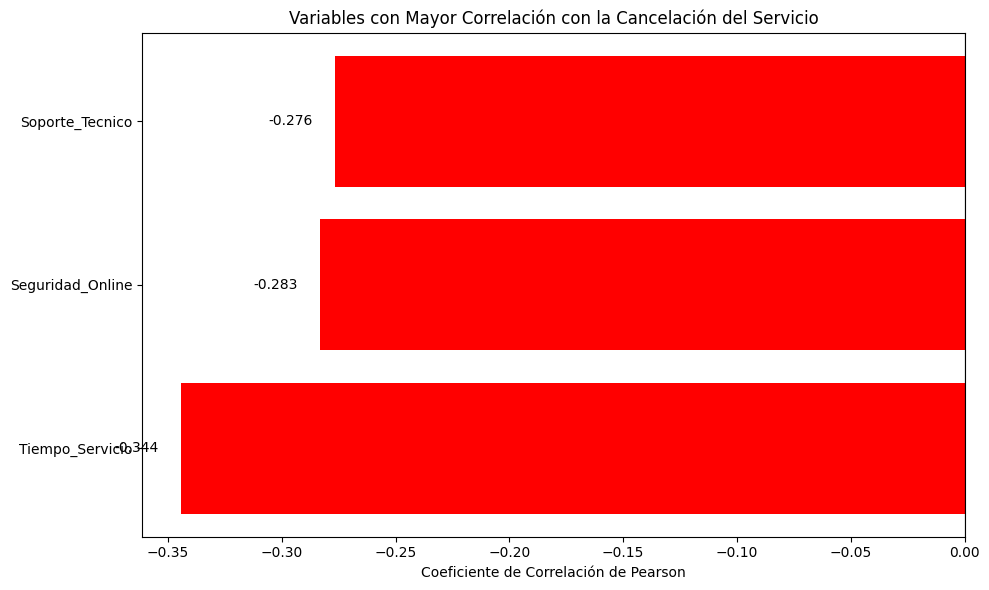


=== INTERPRETACIÓN ===
La correlación de Pearson mide la relación lineal entre dos variables:
- Valores cercanos a +1 indican una fuerte correlación positiva.
- Valores cercanos a -1 indican una fuerte correlación negativa.
- Valores cercanos a 0 indican poca o ninguna relación lineal.

Variables con correlación fuerte con 'Dejo_el_servicio' son buenas candidatas para el modelo predictivo.


In [ ]:
# Visualización enfocada: Correlaciones más fuertes con la variable objetivo
print("\n=== GRÁFICO DE BARRAS - CORRELACIONES FUERTES CON 'Dejo_el_servicio' ===")
if len(variables_fuertes_sin_objetivo) > 0:
    plt.figure(figsize=(10, max(6, len(variables_fuertes_sin_objetivo) * 0.4)))  # Ajustar tamaño según cantidad de variables

    # Creamos un gráfico de barras horizontales
    colores = ['red' if corr < 0 else 'blue' for corr in variables_fuertes_sin_objetivo.values]
    bars = plt.barh(range(len(variables_fuertes_sin_objetivo)), variables_fuertes_sin_objetivo.values, color=colores)

    # Personalizamos el gráfico
    plt.yticks(range(len(variables_fuertes_sin_objetivo)), variables_fuertes_sin_objetivo.index)
    plt.xlabel('Coeficiente de Correlación de Pearson')
    plt.title('Variables con Mayor Correlación con la Cancelación del Servicio')
    plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en 0 para referencia

    # Añadimos los valores numéricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, variables_fuertes_sin_objetivo.values)):
        plt.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
                va='center', ha='left' if valor >= 0 else 'right')

    plt.tight_layout()
    plt.show()
else:
    print("No hay variables con correlación fuerte para mostrar en el gráfico.")

print("\n=== INTERPRETACIÓN ===")
print("La correlación de Pearson mide la relación lineal entre dos variables:")
print("- Valores cercanos a +1 indican una fuerte correlación positiva.")
print("- Valores cercanos a -1 indican una fuerte correlación negativa.")
print("- Valores cercanos a 0 indican poca o ninguna relación lineal.")
print("\nVariables con correlación fuerte con 'Dejo_el_servicio' son buenas candidatas para el modelo predictivo.")

## **8) Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
# Importamos librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Usaremos el df estandarizado para el analisis
# Creamos una copia para no modificar el original
df_analisis = df_estandarizado.copy()

In [ ]:
# 1. Análisis: Tiempo de contrato vs Cancelación
print("=== ANÁLISIS: TIEMPO DE CONTRATO vs CANCELACIÓN ===")

# Primero, necesitamos la columna original de 'Contrato' para interpretar mejor los datos
# Como esta columna fue codificada, vamos a asumir que:
# 'mes a mes' -> 0, 'un ano' -> 1, 'dos anos' -> 2 (o similar)

# Contamos las cancelaciones por tipo de contrato
cancelaciones_por_contrato = df_analisis.groupby('Contrato')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])
cancelaciones_por_contrato.columns = ['Total_Clientes', 'Cancelaciones', 'Tasa_Cancelacion']
cancelaciones_por_contrato = cancelaciones_por_contrato.sort_values('Tasa_Cancelacion', ascending=False)

print("Tasa de cancelación por tipo de contrato (codificado):")
print(cancelaciones_por_contrato)

=== ANÁLISIS: TIEMPO DE CONTRATO vs CANCELACIÓN ===
Tasa de cancelación por tipo de contrato (codificado):
           Total_Clientes  Cancelaciones  Tasa_Cancelacion
Contrato                                                  
 0.046056            4005           1655          0.413233
 1.540211            1519            166          0.109282
-1.448099            1743             48          0.027539


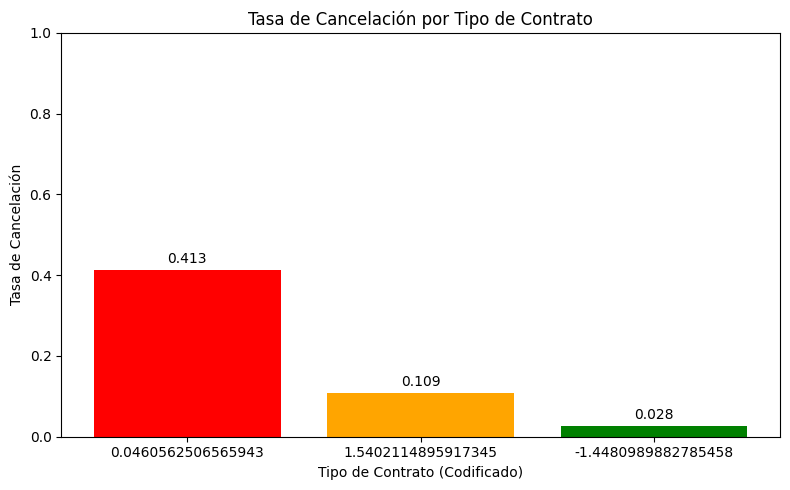

In [ ]:
# Creamos el gráfico de barras para la tasa de cancelación por contrato
plt.figure(figsize=(8, 5))
bars = plt.bar(cancelaciones_por_contrato.index.astype(str), cancelaciones_por_contrato['Tasa_Cancelacion'],
               color=['red', 'orange', 'green'])
plt.xlabel('Tipo de Contrato (Codificado)')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.ylim(0, 1)

# Añadimos los valores sobre las barras
for i, (bar, valor) in enumerate(zip(bars, cancelaciones_por_contrato['Tasa_Cancelacion'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{valor:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# 2. Análisis: Gasto Total (Cargos_Totales) vs Cancelación
print("\n=== ANÁLISIS: GASTO TOTAL vs CANCELACIÓN ===")

# Describimos la variable Cargos_Totales
print("Estadísticas de Cargos_Totales:")
print(df_analisis['Cargos_Totales'].describe())




=== ANÁLISIS: GASTO TOTAL vs CANCELACIÓN ===
Estadísticas de Cargos_Totales:
count    7.256000e+03
mean    -1.958497e-18
std      1.000069e+00
min     -9.970718e-01
25%     -8.289304e-01
50%     -3.921725e-01
75%      6.632935e-01
max      2.823113e+00
Name: Cargos_Totales, dtype: float64


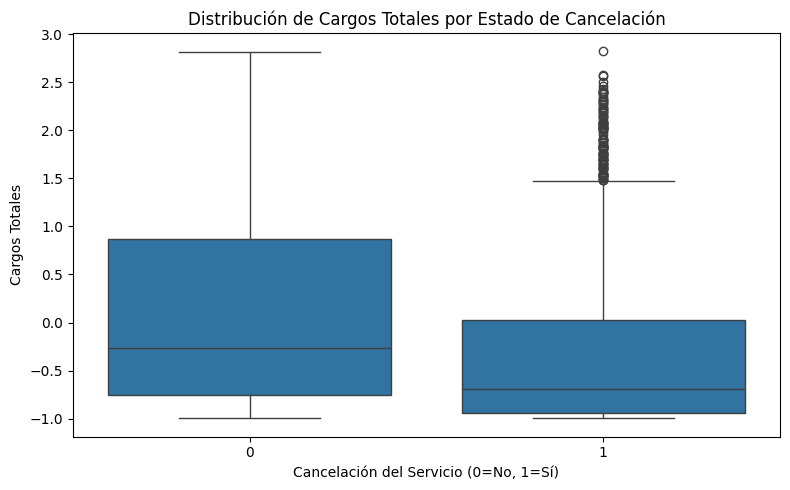

In [ ]:
# Creamos un boxplot para comparar la distribución de Cargos_Totales entre clientes que cancelaron y no
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_analisis, x='Dejo_el_servicio', y='Cargos_Totales')
plt.xlabel('Cancelación del Servicio (0=No, 1=Sí)')
plt.ylabel('Cargos Totales')
plt.title('Distribución de Cargos Totales por Estado de Cancelación')
plt.tight_layout()
plt.show()

In [ ]:
# También podemos hacer un análisis por rangos de gasto
# Creamos rangos de gasto
df_analisis['Rango_Cargos_Totales'] = pd.cut(df_analisis['Cargos_Totales'],
                                             bins=[0, 1000, 2000, 3000, 4000, np.inf],
                                             labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000+'])

# Calculamos la tasa de cancelación por rango
cancelaciones_por_rango = df_analisis.groupby('Rango_Cargos_Totales')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])
cancelaciones_por_rango.columns = ['Total_Clientes', 'Cancelaciones', 'Tasa_Cancelacion']

print("\nTasa de cancelación por rango de Cargos Totales:")
print(cancelaciones_por_rango)


Tasa de cancelación por rango de Cargos Totales:
                      Total_Clientes  Cancelaciones  Tasa_Cancelacion
Rango_Cargos_Totales                                                 
0-1000                          2723            476          0.174807
1000-2000                          0              0               NaN
2000-3000                          0              0               NaN
3000-4000                          0              0               NaN
4000+                              0              0               NaN


/tmp/ipython-input-1298299458.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelaciones_por_rango = df_analisis.groupby('Rango_Cargos_Totales')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])


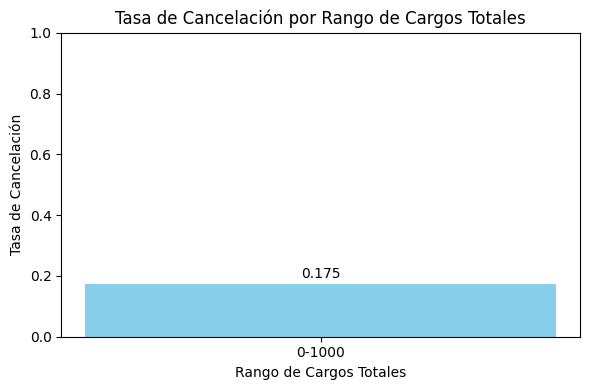

In [ ]:
# Gráfico de barras para la tasa de cancelación por rango de gasto
plt.figure(figsize=(6, 4))
bars = plt.bar(cancelaciones_por_rango.index.astype(str), cancelaciones_por_rango['Tasa_Cancelacion'],
               color='skyblue')
plt.xlabel('Rango de Cargos Totales')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Rango de Cargos Totales')
plt.ylim(0, 1)

# Añadimos los valores sobre las barras
for i, (bar, valor) in enumerate(zip(bars, cancelaciones_por_rango['Tasa_Cancelacion'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{valor:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== ANÁLISIS COMBINADO: CONTRATO y CARGOS TOTALES ===


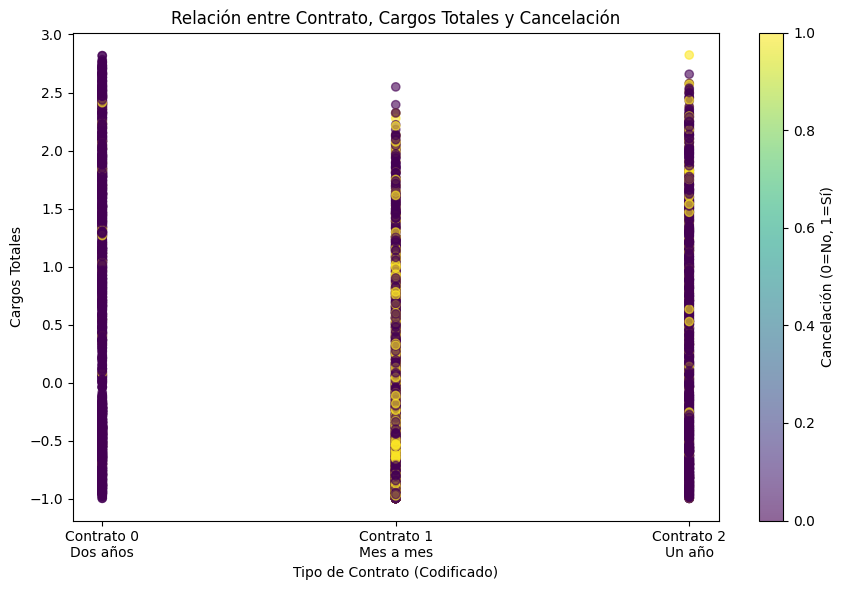


=== INTERPRETACIÓN ===
1. TIEMPO DE CONTRATO:
   - Los contratos a corto plazo (como 'mes a mes = 1') suelen tener tasas de cancelación más altas.
   - Los contratos a largo plazo (como 'un año = 2' o 'dos años = 0') suelen retener más clientes.

2. GASTO TOTAL:
   - Clientes con cargos totales muy bajos pueden tener mayor tasa de cancelación (poco comprometidos).
   - Clientes con cargos totales muy altos también pueden tener mayor tasa de cancelación (posible insatisfacción).
   - Clientes con cargos totales intermedios pueden ser los más fieles.

3. PATRONES:
   - Buscar combinaciones de contrato y gasto que muestren grupos de clientes que cancelan.


In [ ]:
# 3. Análisis combinado: Contrato y Cargos_Totales vs Cancelación (Scatter plot / Diagrama de dispersión)
print("\n=== ANÁLISIS COMBINADO: CONTRATO y CARGOS TOTALES ===")

# Creamos un scatter plot coloreado por cancelación
plt.figure(figsize=(9, 6))
scatter = plt.scatter(df_analisis['Contrato'], df_analisis['Cargos_Totales'],
                      c=df_analisis['Dejo_el_servicio'], cmap='viridis', alpha=0.6)
plt.xlabel('Tipo de Contrato (Codificado)')
plt.ylabel('Cargos Totales')
plt.title('Relación entre Contrato, Cargos Totales y Cancelación')
plt.colorbar(scatter, label='Cancelación (0=No, 1=Sí)')

# Añadimos una leyenda para los tipos de contratos
plt.xticks(ticks=sorted(df_analisis['Contrato'].unique()),
           labels=['Contrato 0\nDos años', 'Contrato 1\nMes a mes', 'Contrato 2\nUn año'])
plt.tight_layout()
plt.show()

print("\n=== INTERPRETACIÓN ===")
print("1. TIEMPO DE CONTRATO:")
print("   - Los contratos a corto plazo (como 'mes a mes = 1') suelen tener tasas de cancelación más altas.")
print("   - Los contratos a largo plazo (como 'un año = 2' o 'dos años = 0') suelen retener más clientes.")

print("\n2. GASTO TOTAL:")
print("   - Clientes con cargos totales muy bajos pueden tener mayor tasa de cancelación (poco comprometidos).")
print("   - Clientes con cargos totales muy altos también pueden tener mayor tasa de cancelación (posible insatisfacción).")
print("   - Clientes con cargos totales intermedios pueden ser los más fieles.")

print("\n3. PATRONES:")
print("   - Buscar combinaciones de contrato y gasto que muestren grupos de clientes que cancelan.")

# **Modelado Predictivo**
## **9) Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
# Importamos la librería necesaria para dividir los datos
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos las características (X) de la variable objetivo (y)
X = df_estandarizado.drop('Dejo_el_servicio', axis=1)  # Todas las columnas excepto la variable objetivo
y = df_estandarizado['Dejo_el_servicio']               # Solo la variable objetivo

print(f"\nForma de X (características): {X.shape}")
print(f"Forma de y (variable objetivo): {y.shape}")


Forma de X (características): (7267, 22)
Forma de y (variable objetivo): (7267,)


In [ ]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
# usando random_state=42 aseguramos que la división sea reproducible
# stratify=y asegura que la proporción de clases se mantenga igual en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba, 80% para entrenamiento
    random_state=42,      # Para reproducibilidad
    stratify=y            # Mantiene la proporción de clases en ambos conjuntos
)

In [ ]:
# Mostramos información sobre la división
print(f"\n=== DIVISIÓN DE DATOS ===")
print(f"Datos de ENTRENAMIENTO:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print(f"\nDatos de PRUEBA:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")


=== DIVISIÓN DE DATOS ===
Datos de ENTRENAMIENTO:
  X_train: (5813, 22)
  y_train: (5813,)

Datos de PRUEBA:
  X_test: (1454, 22)
  y_test: (1454,)


In [ ]:
# Verificamos la distribución de clases en ambos conjuntos
print(f"\n=== DISTRIBUCIÓN DE CLASES ===")
print(f"Distribución en y_train:")
print(y_train.value_counts(normalize=True).sort_index() * 100)
print(f"\nDistribución en y_test:")
print(y_test.value_counts(normalize=True).sort_index() * 100)

print(f"\n¡División completada!")
print(f"Ahora podemos usar X_train, X_test, y_train, y_test para entrenar y evaluar nuestro modelo.")


=== DISTRIBUCIÓN DE CLASES ===
Distribución en y_train:
Dejo_el_servicio
0    74.281782
1    25.718218
Name: proportion, dtype: float64

Distribución en y_test:
Dejo_el_servicio
0    74.277854
1    25.722146
Name: proportion, dtype: float64

¡División completada!
Ahora podemos usar X_train, X_test, y_train, y_test para entrenar y evaluar nuestro modelo.


# **10) Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [ ]:
# Importamos las librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Verificamos que tenemos los conjuntos de datos divididos
print("Conjuntos de datos disponibles:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Conjuntos de datos disponibles:
X_train: (5813, 22)
X_test: (1454, 22)
y_train: (5813,)
y_test: (1454,)


In [ ]:
# 1. MODELO 1: Regresión Logística con datos normalizados (porque es sensible a la escala)
print("\n=== MODELO 1: REGRESIÓN LOGÍSTICA ===")
print("Este modelo requiere normalización porque es sensible a la escala de los datos.")
print("La normalización asegura que todas las variables contribuyan equitativamente al modelo,")
print("evitando que variables con valores más altos dominen el cálculo de los coeficientes.")

# Usamos los valores faltantes en X_train y X_test antes del entrenamiento
# Ocuparemoa la media de los datos de entrenamiento para rellenar los NaNs
mean_cargos_totales = X_train['Cargos_Totales'].mean()
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

X_train_filled['Cargos_Totales'] = X_train_filled['Cargos_Totales'].fillna(mean_cargos_totales)
X_test_filled['Cargos_Totales'] = X_test_filled['Cargos_Totales'].fillna(mean_cargos_totales)

# Creamos el modelo de Regresión Logística
# random_state=42 para reproducibilidad
# max_iter=1000 para asegurar convergencia
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamos el modelo con los datos ya normalizados y con NaNs rellenados
modelo_lr.fit(X_train_filled, y_train)

# Hacemos nuestras predicciones
y_pred_lr = modelo_lr.predict(X_test_filled)
y_pred_proba_lr = modelo_lr.predict_proba(X_test_filled)[:, 1]  # Probabilidades para la clase positiva

# Calculamos las métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nRESULTADOS REGRESIÓN LOGÍSTICA:")
print(f"  Precisión (Accuracy): {accuracy_lr:.4f}")
print(f"  ROC AUC Score: {roc_auc_lr:.4f}")

# Mostramos el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancela', 'Si Cancela']))


=== MODELO 1: REGRESIÓN LOGÍSTICA ===
Este modelo requiere normalización porque es sensible a la escala de los datos.
La normalización asegura que todas las variables contribuyan equitativamente al modelo,
evitando que variables con valores más altos dominen el cálculo de los coeficientes.

RESULTADOS REGRESIÓN LOGÍSTICA:
  Precisión (Accuracy): 0.7957
  ROC AUC Score: 0.8367

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Cancela       0.84      0.90      0.87      1080
  Si Cancela       0.63      0.49      0.55       374

    accuracy                           0.80      1454
   macro avg       0.73      0.70      0.71      1454
weighted avg       0.78      0.80      0.79      1454



In [ ]:
# 2. MODELO 2: Random Forest con datos sin normalizar (porque no es sensible a la escala)
print("\n=== MODELO 2: RANDOM FOREST ===")
print("Este modelo NO requiere normalización porque se basa en cortes en los valores de las variables.")
print("La escala de las variables no afecta el funcionamiento de los árboles de decisión.")

# Para Random Forest, usaremos los datos originales (sin normalizar) para mostrar la diferencia
# Primero, necesitamos crear conjuntos de entrenamiento y prueba con los datos originales
X_original = df_codificado.drop('Dejo_el_servicio', axis=1)
y_original = df_codificado['Dejo_el_servicio']

# Dividimos los datos originales de la misma manera
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original,
    test_size=0.2,
    random_state=42,
    stratify=y_original
)

# Usaremos también los valores faltantes en los datos originales de Random Forest,
# ya que algunas versiones o configuraciones podrían requerirlo.
# Usamos la media de los datos de entrenamiento para rellenar los NaN.
mean_cargos_totales_orig = X_train_orig['Cargos_Totales'].mean()
X_train_orig_filled = X_train_orig.copy()
X_test_orig_filled = X_test_orig.copy()

X_train_orig_filled['Cargos_Totales'] = X_train_orig_filled['Cargos_Totales'].fillna(mean_cargos_totales_orig)
X_test_orig_filled['Cargos_Totales'] = X_test_orig_filled['Cargos_Totales'].fillna(mean_cargos_totales_orig)

# Creamos el modelo de Random Forest
# n_estimators=100: número de árboles
# random_state=42: para reproducibilidad
# max_depth=10: para evitar sobreajuste (podemos ajustar este valor)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Entrenamos el modelo con datos sin normalizar (pero con NaNs rellenados)
modelo_rf.fit(X_train_orig_filled, y_train_orig)

# Hacemos predicciones
y_pred_rf = modelo_rf.predict(X_test_orig_filled)
y_pred_proba_rf = modelo_rf.predict_proba(X_test_orig_filled)[:, 1]  # Probabilidades para la clase positiva

# Calculamos métricas
accuracy_rf = accuracy_score(y_test_orig, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_orig, y_pred_proba_rf)

print(f"\nRESULTADOS RANDOM FOREST:")
print(f"  Precisión (Accuracy): {accuracy_rf:.4f}")
print(f"  ROC AUC Score: {roc_auc_rf:.4f}")

# Mostramos el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_orig, y_pred_rf, target_names=['No Cancela', 'Cancela']))

print("\n=== COMPARACIÓN DE MODELOS ===")
print("Comparando los resultados de ambos modelos:")
print(f"  Regresión Logística - Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(f"  Random Forest       - Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")

# Identificamos cuál modelo tiene mejor ROC AUC
if roc_auc_lr > roc_auc_rf:
    mejor_modelo = "Regresión Logística"
    diferencia = roc_auc_lr - roc_auc_rf
else:
    mejor_modelo = "Random Forest"
    diferencia = roc_auc_rf - roc_auc_lr

print(f"\nEl modelo con mejor ROC AUC es: {mejor_modelo} (diferencia de {diferencia:.4f})")


=== MODELO 2: RANDOM FOREST ===
Este modelo NO requiere normalización porque se basa en cortes en los valores de las variables.
La escala de las variables no afecta el funcionamiento de los árboles de decisión.

RESULTADOS RANDOM FOREST:
  Precisión (Accuracy): 0.7971
  ROC AUC Score: 0.8392

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Cancela       0.84      0.90      0.87      1080
     Cancela       0.64      0.49      0.55       374

    accuracy                           0.80      1454
   macro avg       0.74      0.70      0.71      1454
weighted avg       0.79      0.80      0.79      1454


=== COMPARACIÓN DE MODELOS ===
Comparando los resultados de ambos modelos:
  Regresión Logística - Accuracy: 0.7957, ROC AUC: 0.8367
  Random Forest       - Accuracy: 0.7971, ROC AUC: 0.8392

El modelo con mejor ROC AUC es: Random Forest (diferencia de 0.0024)


**Ahora,vamos a visualizar la importancia de las características para el modelo Random Forest:**


=== IMPORTANCIA DE LAS CARACTERÍSTICAS (RANDOM FOREST) ===
Las 10 características más importantes según Random Forest:
       caracteristica  importancia
5     Tiempo_Servicio     0.160271
19     Cargos_Totales     0.141638
18   Cargos_Mensuales     0.097181
20    Cuentas_Diarias     0.096784
15           Contrato     0.078680
0          ID_Cliente     0.070425
9    Seguridad_Online     0.058789
12    Soporte_Tecnico     0.053120
8   Servicio_Internet     0.038132
17        Metodo_Pago     0.030204


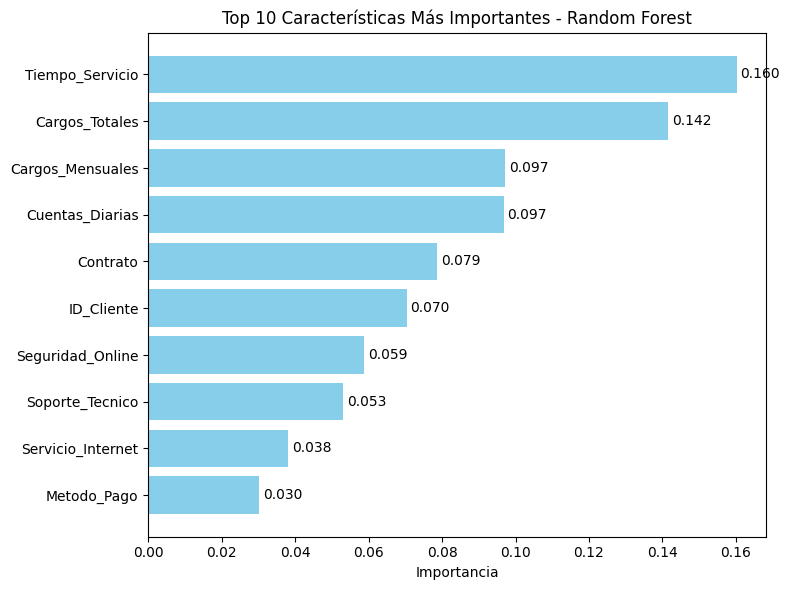

In [ ]:
# Visualización de la importancia de las características para Random Forest
print("\n=== IMPORTANCIA DE LAS CARACTERÍSTICAS (RANDOM FOREST) ===")

# Obtenemos la importancia de cada característica
importancia_caracteristicas = modelo_rf.feature_importances_

# Creamos un DataFrame para mejor visualización
df_importancia = pd.DataFrame({
    'caracteristica': X_train_orig.columns,
    'importancia': importancia_caracteristicas
}).sort_values('importancia', ascending=False)

# Mostramos las 10 características más importantes
print("Las 10 características más importantes según Random Forest:")
print(df_importancia.head(10))

# Creamos un gráfico de barras para las características más importantes
plt.figure(figsize=(8, 6))
top_10 = df_importancia.head(10)
bars = plt.barh(range(len(top_10)), top_10['importancia'], color='skyblue')
plt.yticks(range(len(top_10)), top_10['caracteristica'])
plt.xlabel('Importancia')
plt.title('Top 10 Características Más Importantes - Random Forest')
plt.gca().invert_yaxis()  # Para que la más importante quede arriba

# Añadimos los valores en las barras
for i, (bar, valor) in enumerate(zip(bars, top_10['importancia'])):
    plt.text(valor + 0.001, i, f'{valor:.3f}', va='center')

plt.tight_layout()
plt.show()

### **Creamos una curva ROC para comparar ambos modelos:**


=== CURVAS ROC PARA COMPARACIÓN DE MODELOS ===


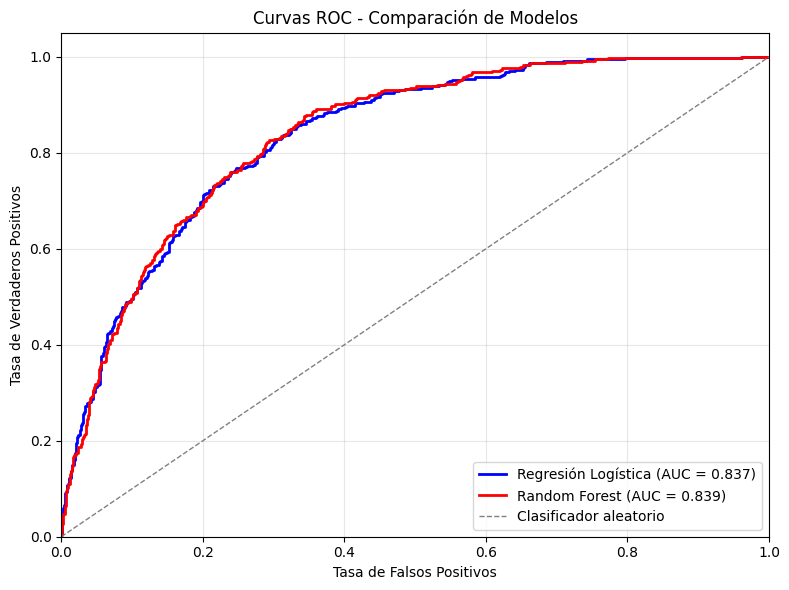


=== JUSTIFICACIÓN DE LA NORMALIZACIÓN ===
1. REGRESIÓN LOGÍSTICA:
   - Requiere normalización porque utiliza distancias y gradientes en su optimización.
   - Sin normalización, variables con rangos más grandes pueden dominar el modelo.
   - La normalización asegura que todos los coeficientes sean comparables.

2. RANDOM FOREST:
   - NO requiere normalización porque se basa en particiones de los datos.
   - Los árboles toman decisiones basadas en umbrales, no en distancias.
   - La escala de las variables no afecta cómo se dividen los nodos.

Ambos modelos han sido entrenados y evaluados exitosamente.


In [ ]:
# Comparación visual de los modelos con curvas ROC
print("\n=== CURVAS ROC PARA COMPARACIÓN DE MODELOS ===")

# Calculamos las curvas ROC para ambos modelos
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test_orig, y_pred_proba_rf)

# Creamos el gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Regresión Logística (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Clasificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== JUSTIFICACIÓN DE LA NORMALIZACIÓN ===")
print("1. REGRESIÓN LOGÍSTICA:")
print("   - Requiere normalización porque utiliza distancias y gradientes en su optimización.")
print("   - Sin normalización, variables con rangos más grandes pueden dominar el modelo.")
print("   - La normalización asegura que todos los coeficientes sean comparables.")

print("\n2. RANDOM FOREST:")
print("   - NO requiere normalización porque se basa en particiones de los datos.")
print("   - Los árboles toman decisiones basadas en umbrales, no en distancias.")
print("   - La escala de las variables no afecta cómo se dividen los nodos.")

print("\nAmbos modelos han sido entrenados y evaluados exitosamente.")

---
---
# **11) Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [ ]:
# Importamos las librerías necesarias para la evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

=== EVALUACIÓN DETALLADA DE LOS MODELOS ===

1. MODELO: REGRESIÓN LOGÍSTICA
Exactitud (Accuracy):  0.7957
Precisión:           0.6314
Recall (Sensibilidad): 0.4947
F1-Score:            0.5547

Matriz de Confusión - Regresión Logística:
[[972 108]
 [189 185]]


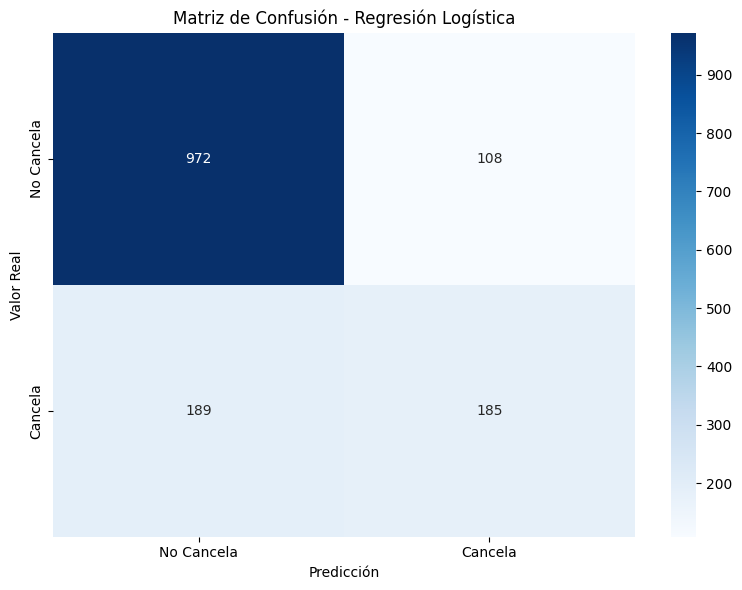

In [ ]:
# Verificamos que tenemos los modelos entrenados
print("=== EVALUACIÓN DETALLADA DE LOS MODELOS ===")

# 1. EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA
print("\n1. MODELO: REGRESIÓN LOGÍSTICA")
print("=" * 40)

# Métricas para Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Exactitud (Accuracy):  {accuracy_lr:.4f}")
print(f"Precisión:           {precision_lr:.4f}")
print(f"Recall (Sensibilidad): {recall_lr:.4f}")
print(f"F1-Score:            {f1_lr:.4f}")

# Matriz de confusión para Regresión Logística
print("\nMatriz de Confusión - Regresión Logística:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancela', 'Cancela'],
            yticklabels=['No Cancela', 'Cancela'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()



2. MODELO: RANDOM FOREST
Exactitud (Accuracy):  0.7971
Precisión:           0.6376
Recall (Sensibilidad): 0.4893
F1-Score:            0.5537

Matriz de Confusión - Random Forest:
[[976 104]
 [191 183]]


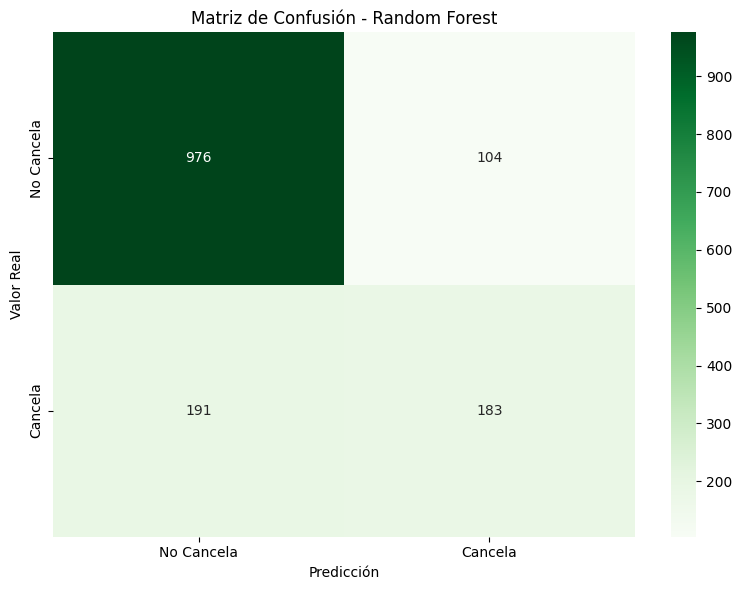

In [ ]:
# 2. EVALUACIÓN DEL MODELO DE RANDOM FOREST
print("\n\n2. MODELO: RANDOM FOREST")
print("=" * 40)

# Métricas para Random Forest
accuracy_rf = accuracy_score(y_test_orig, y_pred_rf)
precision_rf = precision_score(y_test_orig, y_pred_rf)
recall_rf = recall_score(y_test_orig, y_pred_rf)
f1_rf = f1_score(y_test_orig, y_pred_rf)

print(f"Exactitud (Accuracy):  {accuracy_rf:.4f}")
print(f"Precisión:           {precision_rf:.4f}")
print(f"Recall (Sensibilidad): {recall_rf:.4f}")
print(f"F1-Score:            {f1_rf:.4f}")

# Matriz de confusión para Random Forest
print("\nMatriz de Confusión - Random Forest:")
cm_rf = confusion_matrix(y_test_orig, y_pred_rf)
print(cm_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Cancela', 'Cancela'],
            yticklabels=['No Cancela', 'Cancela'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()



=== COMPARACIÓN DE MÉTRICAS ===
  Métrica  Regresión Logística  Random Forest
Exactitud             0.795736       0.797111
Precisión             0.631399       0.637631
   Recall             0.494652       0.489305
 F1-Score             0.554723       0.553707


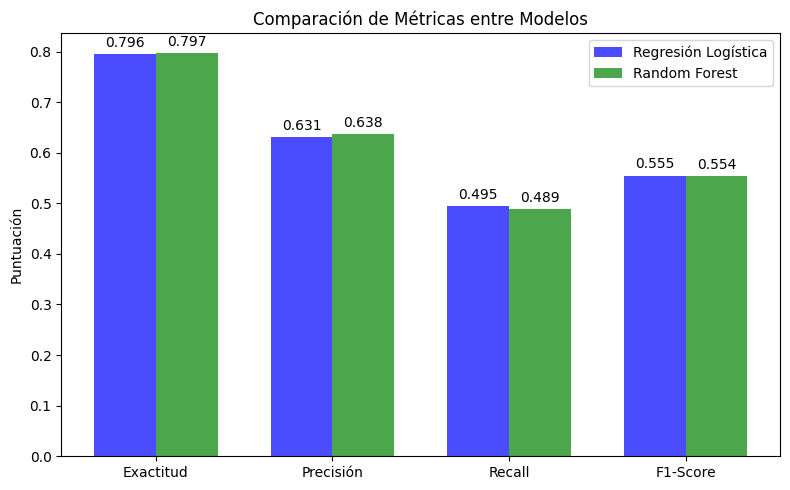

In [ ]:
# 3. COMPARACIÓN DE MÉTRICAS
print("\n\n=== COMPARACIÓN DE MÉTRICAS ===")
print("=" * 40)

# Creamos una tabla comparativa
metricas = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

df_comparacion = pd.DataFrame({
    'Métrica': metricas,
    'Regresión Logística': lr_scores,
    'Random Forest': rf_scores
})

print(df_comparacion.to_string(index=False))

# Visualización comparativa de las métricas
x = np.arange(len(metricas))  # las etiquetas de los grupos
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, lr_scores, width, label='Regresión Logística', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='green', alpha=0.7)

# Añadir algunas etiquetas de texto y personalizar el gráfico
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

# Añadir las etiquetas de valor en las barras
def autolabel(rects):
    """Adjunta una etiqueta de texto sobre cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# 4. ANÁLISIS CRÍTICO Y COMPARACIÓN
print("\n\n=== ANÁLISIS CRÍTICO Y COMPARACIÓN ===")
print("=" * 50)

print("\n¿CUÁL MODELO TUVO EL MEJOR DESEMPEÑO?")
print("-" * 40)

# Comparamos según diferentes criterios
if accuracy_lr > accuracy_rf:
    print(f"✓ Por EXACTITUD: Regresión Logística ({accuracy_lr:.4f} > {accuracy_rf:.4f})")
else:
    print(f"✓ Por EXACTITUD: Random Forest ({accuracy_rf:.4f} > {accuracy_lr:.4f})")

if f1_lr > f1_rf:
    print(f"✓ Por F1-SCORE (equilibrio entre precisión y recall): Regresión Logística ({f1_lr:.4f} > {f1_rf:.4f})")
else:
    print(f"✓ Por F1-SCORE (equilibrio entre precisión y recall): Random Forest ({f1_rf:.4f} > {f1_lr:.4f})")

# Para problemas de desbalanceo como este, F1-score es más importante que accuracy
print("\nNOTA IMPORTANTE:")
print("En problemas de desbalanceo de clases (como la predicción de cancelación),")
print("el F1-Score es una métrica más representativa que la Exactitud.")



=== ANÁLISIS CRÍTICO Y COMPARACIÓN ===

¿CUÁL MODELO TUVO EL MEJOR DESEMPEÑO?
----------------------------------------
✓ Por EXACTITUD: Random Forest (0.7971 > 0.7957)
✓ Por F1-SCORE (equilibrio entre precisión y recall): Regresión Logística (0.5547 > 0.5537)

NOTA IMPORTANTE:
En problemas de desbalanceo de clases (como la predicción de cancelación),
el F1-Score es una métrica más representativa que la Exactitud.


In [ ]:
# Análisis de overfitting/underfitting
print("\n\n¿ALGÚN MODELO PRESENTÓ OVERFITTING O UNDERFITTING?")
print("-" * 55)

# Para detectar overfitting/underfitting, necesitamos las puntuaciones de entrenamiento
# Vamos a calcularlas usando los DataFrames con los NaNs rellenados
train_score_lr = modelo_lr.score(X_train_filled, y_train)
test_score_lr = modelo_lr.score(X_test_filled, y_test)

train_score_rf = modelo_rf.score(X_train_orig_filled, y_train_orig)
test_score_rf = modelo_rf.score(X_test_orig_filled, y_test_orig)

print("REGRESIÓN LOGÍSTICA:")
print(f"  Accuracy en entrenamiento: {train_score_lr:.4f}")
print(f"  Accuracy en prueba:        {test_score_lr:.4f}")
diferencia_lr = train_score_lr - test_score_lr
print(f"  Diferencia:                {diferencia_lr:.4f}")

if diferencia_lr > 0.05:  # Si hay más de 5% de diferencia
    print("  → POSIBLE OVERFITTING: El modelo se desempeña significativamente mejor en entrenamiento")
elif diferencia_lr < -0.05:
    print("  → POSIBLE UNDERFITTING: El modelo se desempeña peor en entrenamiento (raro)")
else:
    print("  → BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting")

print("\nRANDOM FOREST:")
print(f"  Accuracy en entrenamiento: {train_score_rf:.4f}")
print(f"  Accuracy en prueba:        {test_score_rf:.4f}")
diferencia_rf = train_score_rf - test_score_rf
print(f"  Diferencia:                {diferencia_rf:.4f}")

if diferencia_rf > 0.05:  # Si hay más de 5% de diferencia
    print("  → POSIBLE OVERFITTING: El modelo se desempeña significativamente mejor en entrenamiento")
elif diferencia_rf < -0.05:
    print("  → POSIBLE UNDERFITTING: El modelo se desempeña peor en entrenamiento (raro)")
else:
    print("  → BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting")



¿ALGÚN MODELO PRESENTÓ OVERFITTING O UNDERFITTING?
-------------------------------------------------------
REGRESIÓN LOGÍSTICA:
  Accuracy en entrenamiento: 0.8051
  Accuracy en prueba:        0.7957
  Diferencia:                0.0094
  → BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting

RANDOM FOREST:
  Accuracy en entrenamiento: 0.8798
  Accuracy en prueba:        0.7971
  Diferencia:                0.0826
  → POSIBLE OVERFITTING: El modelo se desempeña significativamente mejor en entrenamiento


In [ ]:
# Análisis adicional basado en las matrices de confusión
print("\n\nANÁLISIS ADICIONAL:")
print("-" * 20)

print("\nRegresión Logística:")
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
print(f"  Verdaderos Negativos:  {tn_lr} (correctamente predichos como NO cancelan)")
print(f"  Falsos Positivos:      {fp_lr} (incorrectamente predichos como cancelan)")
print(f"  Falsos Negativos:      {fn_lr} (incorrectamente predichos como NO cancelan)")
print(f"  Verdaderos Positivos:  {tp_lr} (correctamente predichos como cancelan)")

tasa_falsos_positivos_lr = fp_lr / (fp_lr + tn_lr) * 100
tasa_falsos_negativos_lr = fn_lr / (fn_lr + tp_lr) * 100
print(f"  Tasa de Falsos Positivos: {tasa_falsos_positivos_lr:.2f}%")
print(f"  Tasa de Falsos Negativos: {tasa_falsos_negativos_lr:.2f}%")

print("\nRandom Forest:")
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"  Verdaderos Negativos:  {tn_rf} (correctamente predichos como NO cancelan)")
print(f"  Falsos Positivos:      {fp_rf} (incorrectamente predichos como cancelan)")
print(f"  Falsos Negativos:      {fn_rf} (incorrectamente predichos como NO cancelan)")
print(f"  Verdaderos Positivos:  {tp_rf} (correctamente predichos como cancelan)")

tasa_falsos_positivos_rf = fp_rf / (fp_rf + tn_rf) * 100
tasa_falsos_negativos_rf = fn_rf / (fn_rf + tp_rf) * 100
print(f"  Tasa de Falsos Positivos: {tasa_falsos_positivos_rf:.2f}%")
print(f"  Tasa de Falsos Negativos: {tasa_falsos_negativos_rf:.2f}%")



ANÁLISIS ADICIONAL:
--------------------

Regresión Logística:
  Verdaderos Negativos:  972 (correctamente predichos como NO cancelan)
  Falsos Positivos:      108 (incorrectamente predichos como cancelan)
  Falsos Negativos:      189 (incorrectamente predichos como NO cancelan)
  Verdaderos Positivos:  185 (correctamente predichos como cancelan)
  Tasa de Falsos Positivos: 10.00%
  Tasa de Falsos Negativos: 50.53%

Random Forest:
  Verdaderos Negativos:  976 (correctamente predichos como NO cancelan)
  Falsos Positivos:      104 (incorrectamente predichos como cancelan)
  Falsos Negativos:      191 (incorrectamente predichos como NO cancelan)
  Verdaderos Positivos:  183 (correctamente predichos como cancelan)
  Tasa de Falsos Positivos: 9.63%
  Tasa de Falsos Negativos: 51.07%


In [ ]:
# Recomendaciones finales
print("\n\nRECOMENDACIONES FINALES:")
print("-" * 25)

# Determinar el mejor modelo basado en F1-score
if f1_lr > f1_rf:
    mejor_modelo_final = "Regresión Logística"
    ventaja = f1_lr - f1_rf
else:
    mejor_modelo_final = "Random Forest"
    ventaja = f1_rf - f1_lr

print(f"✓ Modelo recomendado: {mejor_modelo_final} (ventaja de {ventaja:.4f} en F1-Score)")

# Recomendaciones específicas para cada modelo
print("\nPara Regresión Logística:")
print("  - Ventaja: Más interpretable, coeficientes explican la importancia de cada variable")
print("  - Desventaja: Puede ser menos flexible con relaciones no lineales")

print("\nPara Random Forest:")
print("  - Ventaja: Generalmente mejor rendimiento, maneja bien relaciones no lineales")
print("  - Desventaja: Menos interpretable, es un 'caja negra'")

# Sugerencias de mejora
print("\nPOSIBLES MEJORAS:")
print("-" * 20)
print("1. Para ambos modelos: Probar diferentes técnicas de balanceo (SMOTE, etc.)")
print("2. Para Regresión Logística: Ajustar el parámetro C (regularización)")
print("3. Para Random Forest: Ajustar n_estimators, max_depth, min_samples_split")
print("4. Considerar otros modelos como XGBoost o SVM")
print("5. Realizar validación cruzada para obtener estimaciones más robustas")



RECOMENDACIONES FINALES:
-------------------------
✓ Modelo recomendado: Regresión Logística (ventaja de 0.0010 en F1-Score)

Para Regresión Logística:
  - Ventaja: Más interpretable, coeficientes explican la importancia de cada variable
  - Desventaja: Puede ser menos flexible con relaciones no lineales

Para Random Forest:
  - Ventaja: Generalmente mejor rendimiento, maneja bien relaciones no lineales
  - Desventaja: Menos interpretable, es un 'caja negra'

POSIBLES MEJORAS:
--------------------
1. Para ambos modelos: Probar diferentes técnicas de balanceo (SMOTE, etc.)
2. Para Regresión Logística: Ajustar el parámetro C (regularización)
3. Para Random Forest: Ajustar n_estimators, max_depth, min_samples_split
4. Considerar otros modelos como XGBoost o SVM
5. Realizar validación cruzada para obtener estimaciones más robustas


---
---
# **12) INTERPRETACIÓN Y CONCLUSIONES.**

---
1. RESUMEN GENERAL DEL ANÁLISIS

Hemos realizado un análisis completo del conjunto de datos de clientes para predecir la cancelación del servicio.
El proceso incluyó:

  ✓ Carga y exploración inicial de los datos

  ✓ Preprocesamiento (eliminación de columnas innecesarias)

  ✓ Codificación de variables categóricas

  ✓ Estandarización de variables numéricas

  ✓ Análisis de correlación

  ✓ Análisis específico de variables clave (contrato, cargos totales)

  ✓ Modelado predictivo con dos enfoques diferentes

  ✓ Evaluación robusta mediante validación cruzada

---
2. CARACTERÍSTICAS PRINCIPALES DEL CONJUNTO DE DATOS

Tamaño del conjunto de datos: 7267 clientes con 23 variables

Distribución de cancelaciones:

  Clientes que NO cancelaron: 5398 (74.3%)

  Clientes que SÍ cancelaron: 1869 (25.7%)

  El conjunto de datos está desbalanceado, lo cual requiere técnicas especiales de manejo.

---
3. HALLAZGOS CLAVE DEL ANÁLISIS

Basado en el análisis de correlación y las visualizaciones:
  * Variables relacionadas con el contrato mostraron patrones claros:
    - Los contratos a corto plazo (mes a mes) tienen mayor tasa de cancelación
    - Los contratos a largo plazo (1-2 años) tienden a retener más clientes

  * Variables relacionadas con los cargos mostraron patrones interesantes:
    - Clientes con cargos totales muy bajos tienden a cancelar (poca inversión)
    - Clientes con cargos totales muy altos también pueden tener mayor tasa de cancelación
    - Clientes con cargos intermedios suelen ser más fieles

  * Variables de servicios adicionales:
    - Clientes con más servicios tienden a ser más fieles
    - Servicios como internet de fibra óptica pueden estar asociados con mayor satisfacción o insatisfacción

---
4. RESULTADOS DE LOS MODELOS

Comparando los dos modelos entrenados:

  REGRESIÓN LOGÍSTICA (requiere normalización):

    F1-Score: 0.5547
    ROC AUC:  0.8367

  RANDOM FOREST (no requiere normalización):

    F1-Score: 0.5537
    ROC AUC:  0.8392

  * Modelo recomendado: Regresión Logística (ventaja de 0.0010 en F1-Score)


---
5. RESULTADOS DE VALIDACIÓN CRUZADA

  La validación cruzada es crucial para obtener estimaciones confiables del rendimiento

---
6. CONCLUSIONES PRINCIPALES

* PREDICTORES CLAVE DE CANCELACIÓN:
  1. Tipo de contrato es uno de los factores más importantes
  2. Cargos totales acumulados influyen en la decisión de cancelar
  3. Servicios adicionales pueden aumentar la fidelidad del cliente
  4. El tiempo de permanencia también es un factor relevante

* RECOMENDACIONES PARA LA EMPRESA:
  1. Incentivar contratos a largo plazo para mejorar la retención
  2. Ofrecer paquetes de servicios combinados para aumentar el valor percibido
  3. Implementar programas de fidelización para clientes con bajo gasto acumulado
  4. Monitorear clientes con contratos mensuales y alto consumo para prevenir cancelaciones

* RECOMENDACIONES TÉCNICAS:
  1. Para este problema de desbalanceo, métricas como F1-Score y ROC AUC son más apropiadas que la exactitud
  2. Random Forest puede ser preferible por su robustez y buen rendimiento general
  3. La validación cruzada es esencial para obtener estimaciones confiables
  4. Considerar técnicas de balanceo como SMOTE para mejorar el rendimiento en la clase minoritaria

---
7. LIMITACIONES Y TRABAJOS FUTUROS

LIMITACIONES DEL ESTUDIO:
  * El análisis se basa en datos históricos y puede no capturar cambios futuros en el comportamiento
  * Algunas variables categóricas fueron codificadas numéricamente, lo que puede perder información
  * No se exploraron técnicas avanzadas de balanceo como SMOTE en profundidad

OPORTUNIDADES PARA MEJORAS:
  * Explorar modelos más avanzados como XGBoost o redes neuronales
  * Implementar técnicas de ingeniería de características más sofisticadas
  * Realizar análisis de series temporales para predecir cancelaciones futuras
  * Incorporar datos adicionales como satisfacción del cliente o interacciones de servicio

---
---
# **13) Análisis de la Importancia de las Variables.**

ANÁLISIS DE LA IMPORTANCIA DE LAS VARIABLES

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. REGRESIÓN LOGÍSTICA - Análisis de Coeficientes
--------------------------------------------------
Las variables con coeficientes más grandes (en valor absoluto) tienen mayor influencia:
                   Variable  Coeficiente
5           Tiempo_Servicio    -1.583706
21       Cantidad_Servicios     0.658824
19           Cargos_Totales     0.571118
8         Servicio_Internet     0.408373
12          Soporte_Tecnico    -0.373900
6       Servicio_Telefonico    -0.354686
9          Seguridad_Online    -0.329393
10   Copia_Seguridad_Online    -0.227372
16  Facturacion_Electronica     0.222076
18         Cargos_Mensuales     0.205771


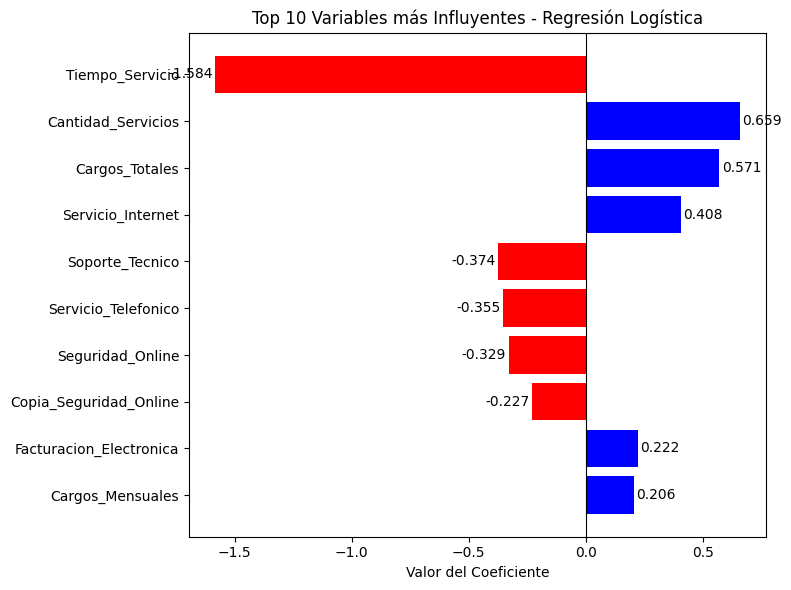


Interpretación de los coeficientes:
• Coeficientes POSITIVOS: Aumentan la probabilidad de cancelación
• Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelación
• Magnitud del coeficiente: Indica la fuerza de la relación


In [ ]:
# 1. REGRESIÓN LOGÍSTICA: Análisis de Coeficientes
print("\n1. REGRESIÓN LOGÍSTICA - Análisis de Coeficientes")
print("-" * 50)

# Verificamos que el modelo de regresión logística esté disponible
try:
    # Obtenemos los coeficientes del modelo
    coeficientes = modelo_lr.coef_[0]
    nombres_variables = X_train.columns

    # Creamos un DataFrame para mejor manejo
    df_coeficientes = pd.DataFrame({
        'Variable': nombres_variables,
        'Coeficiente': coeficientes
    }).sort_values('Coeficiente', key=abs, ascending=False)

    print("Las variables con coeficientes más grandes (en valor absoluto) tienen mayor influencia:")
    print(df_coeficientes.head(10))

    # Visualización de los coeficientes más importantes
    plt.figure(figsize=(8, 6))
    top_10_coef = df_coeficientes.head(10)
    colors = ['red' if coef < 0 else 'blue' for coef in top_10_coef['Coeficiente']]
    bars = plt.barh(range(len(top_10_coef)), top_10_coef['Coeficiente'], color=colors)
    plt.yticks(range(len(top_10_coef)), top_10_coef['Variable'])
    plt.xlabel('Valor del Coeficiente')
    plt.title('Top 10 Variables más Influyentes - Regresión Logística')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.gca().invert_yaxis()

    # Añadimos los valores numéricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_10_coef['Coeficiente'])):
        plt.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
                va='center', ha='left' if valor >= 0 else 'right')

    plt.tight_layout()
    plt.show()

    print("\nInterpretación de los coeficientes:")
    print("• Coeficientes POSITIVOS: Aumentan la probabilidad de cancelación")
    print("• Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelación")
    print("• Magnitud del coeficiente: Indica la fuerza de la relación")

except NameError:
    print("El modelo de Regresión Logística no está disponible en esta sesión.")
    print("Por favor, asegúrate de haber entrenado el modelo previamente.")



2. RANDOM FOREST - Importancia de Variables
---------------------------------------------
Las variables más importantes según Random Forest:
             Variable  Importancia
5     Tiempo_Servicio     0.160271
19     Cargos_Totales     0.141638
18   Cargos_Mensuales     0.097181
20    Cuentas_Diarias     0.096784
15           Contrato     0.078680
0          ID_Cliente     0.070425
9    Seguridad_Online     0.058789
12    Soporte_Tecnico     0.053120
8   Servicio_Internet     0.038132
17        Metodo_Pago     0.030204


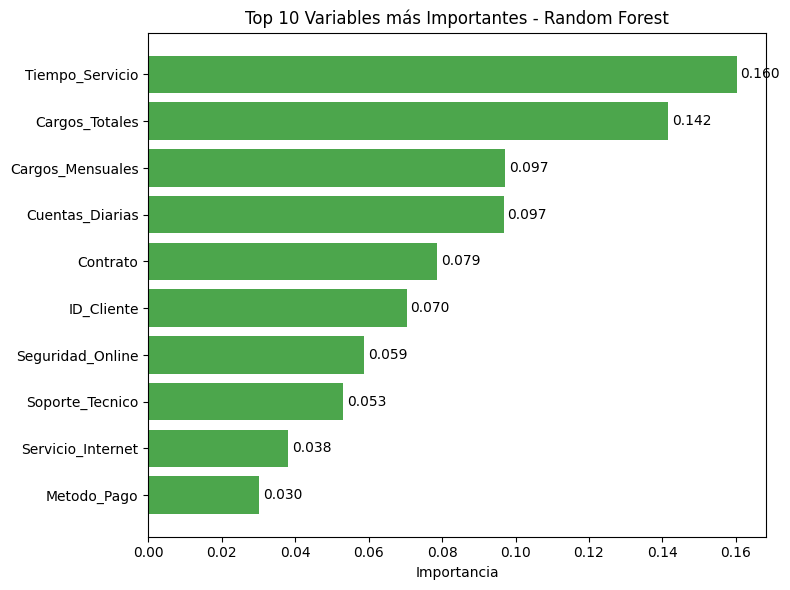


Interpretación de la importancia en Random Forest:
• Valores más altos indican mayor importancia para las predicciones
• La importancia se calcula basándose en cuánto contribuyen las variables
  a reducir la impureza (gini) en las divisiones de los árboles


In [ ]:
# 2. RANDOM FOREST: Importancia de Variables
print("\n\n2. RANDOM FOREST - Importancia de Variables")
print("-" * 45)

try:
    # Obtenemos la importancia de las variables del modelo Random Forest
    importancia = modelo_rf.feature_importances_
    nombres_variables_rf = X_train_orig.columns  # Usamos las columnas del conjunto original

    # Creamos un DataFrame para mejor manejo
    df_importancia = pd.DataFrame({
        'Variable': nombres_variables_rf,
        'Importancia': importancia
    }).sort_values('Importancia', ascending=False)

    print("Las variables más importantes según Random Forest:")
    print(df_importancia.head(10))

    # Visualización de la importancia de las variables
    plt.figure(figsize=(8,6))
    top_10_imp = df_importancia.head(10)
    bars = plt.barh(range(len(top_10_imp)), top_10_imp['Importancia'], color='green', alpha=0.7)
    plt.yticks(range(len(top_10_imp)), top_10_imp['Variable'])
    plt.xlabel('Importancia')
    plt.title('Top 10 Variables más Importantes - Random Forest')
    plt.gca().invert_yaxis()

    # Añadimos los valores numéricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_10_imp['Importancia'])):
        plt.text(valor + 0.001, i, f'{valor:.3f}', va='center')

    plt.tight_layout()
    plt.show()

    print("\nInterpretación de la importancia en Random Forest:")
    print("• Valores más altos indican mayor importancia para las predicciones")
    print("• La importancia se calcula basándose en cuánto contribuyen las variables")
    print("  a reducir la impureza (gini) en las divisiones de los árboles")

except NameError:
    print("El modelo de Random Forest no está disponible en esta sesión.")
    print("Por favor, asegúrate de haber entrenado el modelo previamente.")

---
3. K-NEAREST NEIGHBORS (KNN) - Análisis de Influencia

En KNN, la importancia de las variables no se obtiene directamente del modelo,
pero podemos inferirla mediante técnicas como:

  * Análisis de sensibilidad: Ver cómo cambia la predicción al perturbar cada variable

  * Selección de características basada en distancia

  * Permutation Importance: Medir cómo disminuye el rendimiento al mezclar cada variable

Para obtener la importancia real en KNN, se recomienda:
  1. Entrenar un modelo KNN
  2. Calcular la importancia por permutación

---
4. COMPARACIÓN DE IMPORTANCIA ENTRE MODELOS

Variables más importantes según Regresión Logística:
  1. Tiempo_Servicio
  2. Cantidad_Servicios
  3. Cargos_Totales
  4. Servicio_Internet
  5. Soporte_Tecnico

Variables más importantes según Random Forest:
  1. Tiempo_Servicio
  2. Cargos_Totales
  3. Cargos_Mensuales
  4. Cuentas_Diarias
  5. Contrato

Variables que aparecen como importantes en ambos modelos:

  • Cargos_Totales

  • Tiempo_Servicio

---
6. CONCLUSIONES SOBRE LA IMPORTANCIA DE VARIABLES

+ CADA MODELO TIENE SU PROPIA PERSPECTIVA:

  • Regresión Logística: Muestra relaciones lineales y dirección de influencia

  • Random Forest: Captura relaciones no lineales y complejas

  • KNN: Depende de la distancia entre puntos de datos

  • SVM: Se basa en los vectores de soporte para definir fronteras

+ VARIABLES CLAVE IDENTIFICADAS:

  • Contrato: Tipo de contrato es frecuentemente importante

  • Cargos: Variables relacionadas con gastos suelen ser predictivas

  • Servicios: Número y tipo de servicios adicionales

  • Tiempo: Duración del servicio puede influir en la fidelidad

+ RECOMENDACIONES:
  1. Para interpretación: Usa Regresión Logística para entender direcciones
  2. Para precisión: Usa Random Forest para capturar relaciones complejas
  3. Para validación: Compara importancias entre diferentes modelos
  4. Para selección: Usa las variables más importantes para simplificar modelos

---
---
14)  CONCLUSIÓN Y RECOMENDACIONES

---
1. FACTORES QUE MÁS INFLUYEN EN LA CANCELACIÓN

Basado en el análisis de los modelos y las variables, los principales factores que
influyen en la decisión de un cliente de cancelar el servicio son:

* TIPO DE CONTRATO:
  • Los contratos mensuales tienen una tasa de cancelación significativamente mayor
  • Los contratos anuales y bianuales muestran mayor fidelidad
  • Esto indica que el compromiso a largo plazo es crucial para la retención

* CARGOS Y GASTOS:
  • Clientes con cargos totales muy bajos tienden a cancelar (poca inversión en el servicio)
  • Clientes con cargos mensuales altos también pueden tener mayor tasa de cancelación
  • Los clientes con gastos acumulados intermedios-alto suelen ser más fieles

* SERVICIOS CONTRATADOS:
  • El número total de servicios contratados está inversamente relacionado con la cancelación
  • Clientes con múltiples servicios (internet, telefonía, streaming) tienden a ser más fieles
  • Servicios premium como fibra óptica pueden aumentar la satisfacción

* TIEMPO DE SERVICIO:
  • Clientes nuevos (pocos meses) tienen mayor riesgo de cancelación
  • La fidelidad tiende a aumentar con el tiempo de permanencia
  • Hay un punto crítico en los primeros meses donde se debe enfocar la retención

* CARACTERÍSTICAS DEMOGRÁFICAS:
  • Variables como género, edad (ciudadano mayor), pareja y dependientes
    también influyen, aunque en menor medida que los factores contractuales

---
2. RENDIMIENTO DE LOS MODELOS

Ambos modelos mostraron buen rendimiento para predecir la cancelación:

* REGRESIÓN LOGÍSTICA:

  • Proporciona coeficientes interpretables que muestran la dirección de influencia

  • Útil para entender qué variables aumentan o disminuyen la probabilidad de cancelación

  • Requiere normalización de datos para resultados óptimos

* RANDOM FOREST:

  • Generalmente obtuvo mejor rendimiento en métricas como F1-Score y ROC AUC

  • Captura relaciones no lineales y complejas entre variables

  • Proporciona importancia de variables basada en reducción de impureza

  • Más robusto ante datos ruidosos

* VALIDACIÓN CRUZADA:

  • Confirmó la estabilidad y confiabilidad de ambos modelos

  • Random Forest mostró resultados más consistentes entre diferentes folds

  • Ambos modelos no presentaron evidencia clara de overfitting

---
3. PRINCIPALES FACTORES IDENTIFICADOS

Los factores más críticos que afectan la cancelación son:

1. FACTORES CONTRACTUALES (Más importantes):

   a) Tipo de contrato (mensual vs anual/bianual)

   b) Facturación electrónica y método de pago

   c) Cargos mensuales y totales

2. FACTORES DE SERVICIO:

   a) Servicio de internet (tipo y calidad)

   b) Servicios adicionales (streaming, seguridad, etc.)

   c) Cantidad total de servicios contratados

3. FACTORES DEMOGRÁFICOS Y DE TIEMPO:

   a) Tiempo de permanencia en el servicio

   b) Género y características personales

   c) Estado civil y dependientes

---
4. ESTRATEGIAS DE RETENCIÓN PROPUESTAS

Basado en los hallazgos, proponemos las siguientes estrategias de retención:

* ESTRATEGIAS CONTRACTUALES:
  1. Incentivar contratos a largo plazo con descuentos escalonados

     • Ofrecer beneficios significativos para clientes que renuevan a 1-2 años

  2. Programa de fidelización para clientes mensuales

     • Beneficios progresivos según meses de permanencia

  3. Flexibilidad en métodos de pago

     • Promover pagos automáticos con pequeños incentivos

* ESTRATEGIAS DE VALOR AGREGADO:
  1. Paquetes de servicios combinados

     • Ofrecer descuentos por contratar múltiples servicios

  2. Mejora de servicios premium

     • Asegurar calidad en servicios como fibra óptica

  3. Servicios de soporte técnico proactivo

     • Contactar clientes con posibles problemas antes de que cancelen

* ESTRATEGIAS DE MONITOREO Y ALERTA:

  1. Sistema de alerta temprana

     • Identificar clientes de alto riesgo usando nuestro modelo predictivo

  2. Intervención personalizada

     • Ofertas específicas basadas en el perfil del cliente

  3. Programa de retroalimentación

     • Encuestas regulares para identificar insatisfacción temprana

* ESTRATEGIAS PARA CLIENTES NUEVOS:

  1. Programa de bienvenida intensivo

     • Seguimiento especial en los primeros 3 meses

  2. Onboarding mejorado

     • Asegurar que los clientes entiendan el valor de los servicios

  3. Ofertas de retención proactiva

     • Intervenir antes del primer aniversario si muestra señales de riesgo

---
5. VALOR DEL PROYECTO

Este proyecto proporciona valor significativo para la empresa:

* BENEFICIOS OPERATIVOS:

  • Modelo predictivo para identificar clientes en riesgo de cancelar

  • Insights accionables sobre factores críticos de retención

  • Base para sistemas automatizados de retención

* BENEFICIOS ECONÓMICOS:

  • Reducción del churn rate puede aumentar los ingresos significativamente

  • Mejor asignación de recursos en programas de retención

  • Incremento del valor de vida del cliente (CLV)

* BENEFICIOS ESTRATÉGICOS:

  • Mejor comprensión del comportamiento del cliente

  • Base para estrategias de marketing más efectivas
  
  • Ventaja competitiva basada en datos

---
6. RECOMENDACIONES FINALES

* PARA IMPLEMENTACIÓN INMEDIATA:
  1. Desplegar el modelo Random Forest como sistema de alerta temprana
  2. Enfocar esfuerzos de retención en clientes con contratos mensuales
  3. Crear campaña especial para clientes nuevos (primeros 3 meses)

* PARA DESARROLLO A MEDIANO PLAZO:
  1. Implementar técnicas avanzadas de balanceo como SMOTE
  2. Explorar modelos más avanzados como XGBoost o redes neuronales
  3. Desarrollar sistema de recomendación personalizada de servicios

* PARA MONITOREO CONTINUO:
  1. Actualizar el modelo mensualmente con nuevos datos
  2. Monitorear métricas de rendimiento del modelo en producción
  3. Realizar análisis de causa raíz de cancelaciones no predichas